In [36]:
import warnings

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as sps

import sklearn.metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import (
    confusion_matrix, mean_squared_error, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier, DMatrix

from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from catboost.datasets import titanic

warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('data_p1_jap_features.csv')
df.head()

,Unnamed: 0,W_rating,B_rating,mean_deltawinrate,mean_deltaScore50p,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,beautifulS_percent,mean_utility,...,mean_utility 20,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose,mean_dist,dispersy_dist
0,0,3k,3k,-0.040488,-2.377734,-3.464560,23.954890,0.406667,0.160000,-0.088362,...,-0.000262,0.000260,0.226667,0.073333,-2.573400,-2.146336,10.538134,-0.004645,5.213333,20.514489
1,1,3k,3k,-0.043191,-0.491949,-0.753123,1.472670,0.375000,0.187500,-0.087056,...,-0.087056,-0.043191,0.375000,0.187500,-0.753123,-1.022411,1.472670,-0.087056,4.625000,19.234375
2,2,3k,3k,-0.089254,-2.030399,-2.458237,7.392600,0.272727,0.090909,-0.188092,...,-0.188092,-0.089254,0.272727,0.090909,-2.458237,-2.900573,7.392600,-0.188092,7.272727,68.925620
3,3,3k,3k,-0.019591,-0.824960,-3.583750,203.173883,0.536765,0.433824,-0.047196,...,0.030994,-0.066028,0.169118,0.088235,-9.081688,-7.362831,575.227179,-0.149602,5.845588,45.512922
4,4,3k,3k,-0.065001,-1.265764,-2.280660,15.159420,0.162791,0.162791,-0.137663,...,-0.175444,-0.087452,0.046512,0.046512,-5.938662,-5.755159,47.043784,-0.200001,5.558140,29.176852


In [284]:
features =['mean_deltawinrate', 
           'mean_deltascoreLead', 
           'dispersy_scoreLead',
           'beautiful_percent',
           'mean_utility',
           'beautifulS_percent', 
           'Score25p',
           'Score75p',
           'median_scorelead', 
           'mean_deltaScore50p', 
           'mean_deltaSelfPlay',
           'Winrate25p', 
           'Winrate75p', 
           'mean_deltawinrate50p', 
           'mean_deltawinrate 10', 
           'beautiful_percent 10', 
           'beautifulS_percent 10',
           'mean_deltascoreLead 10', 
           'mean_deltaSelfPlay 10',
           'dispersy_scoreLead 10', 
           'mean_utility 10', 
           'mean_deltawinrate 20',
           'beautiful_percent 20', 
           'beautifulS_percent 20',
           'mean_deltascoreLead 20', 
           'mean_deltaSelfPlay 20',
           'dispersy_scoreLead 20', 
           'mean_utility 20', 
           'mean_deltawinrate yose',
           'beautiful_percent yose', 
           'beautifulS_percent yose',
           'mean_deltascoreLead yose', 
           'mean_deltaSelfPlay yose',
           'dispersy_scoreLead yose', 
           'mean_utility yose', 
           'mean_dist',
           'dispersy_dist']

X = df[features]
Y = df['W_rating']
y = []
for r in Y:
    if (r[1] == 'k'):
        y.append(-(int(r[0]) - int('1')))
    else:
        y.append(int(r[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. XGBoost

In [285]:
xgb_model = XGBRegressor(
    silent=True, max_depth=4, n_estimators=200, random_state=42, verbosity=0,
    learning_rate=0.1, min_child_weight=1, booster='gbtree'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test, y_test)
print(mean_absolute_error(y_pred, y_test)) 

1.8532792614295541


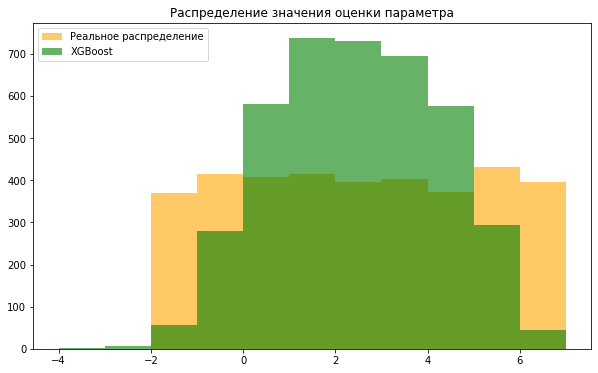

In [230]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    y_test,
    bins = bins,
    alpha = 0.6,
    color = 'orange',
    label = 'Реальное распределение'
)
plt.hist(
    y_pred,
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'XGBoost'
)
plt.legend()
plt.show()

In [140]:
xgb_model

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=175, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)

In [ ]:
%%time

parameters_grid = {
    'n_estimators' : [100, 1000, 1500, 2000],
    'max_depth' : range(1, 15, 2),
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel' : [0.7, 0.8, 0.9, 1.0] ,
    'lambda' : sps.expon(loc=0, scale=1),
    'alpha' : sps.expon(loc=0, scale=1),
    'eta' : [0.001, 0.1, 1, 10]
}

# задаем стратегию кросс-валидации
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=xgb_model,
    # количество итераций поиска 
    n_iter=200,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='r2',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=1,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=42
)

# выполняем поиск по сетке
gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [158]:
native_xgb_model = xgb_model.get_booster()
for name, value in Counter(native_xgb_model.get_fscore()).most_common():
    print('"' + name + '",')

"mean_dist",
"dispersy_dist",
"mean_deltawinrate50p",
"mean_utility",
"mean_deltawinrate",
"Winrate25p",
"Score75p",
"dispersy_scoreLead",
"Winrate75p",
"mean_deltascoreLead",
"Score25p",
"beautiful_percent",
"beautiful_percent 20",
"beautifulS_percent 20",
"beautiful_percent 10",
"mean_deltaScore50p",
"median_scorelead",
"mean_deltascoreLead yose",
"beautiful_percent yose",
"mean_deltaSelfPlay",
"dispersy_scoreLead 10",
"mean_deltascoreLead 20",
"dispersy_scoreLead yose",
"beautifulS_percent 10",
"mean_deltaSelfPlay 20",
"mean_deltascoreLead 10",
"dispersy_scoreLead 20",
"beautifulS_percent",
"mean_utility 10",
"mean_deltawinrate yose",
"mean_deltawinrate 20",
"mean_deltaSelfPlay 10",
"beautifulS_percent yose",
"mean_deltaSelfPlay yose",
"mean_utility yose",
"mean_deltawinrate 10",
"mean_utility 20",


In [82]:
xgb_params = {
    "booster": "gbtree",
    "learning_rate": 0.1,
    "max_depth": 5,
    "min_child_weight": 1,
    "gamma": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [83]:
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test, y_test)
evallist = [(xgtest, 'eval'), (xgtrain, 'train')]

In [84]:
cvresult = xgb.cv(
    xgb_params, xgtrain, num_boost_round=3000, 
    nfold=5, early_stopping_rounds=300
)

In [86]:
cvresult[-3:]

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
196,0.968812,0.016586,1.897338,0.026538
197,0.966233,0.016813,1.897141,0.026091
198,0.963526,0.016025,1.896760,0.026517


In [87]:
param_grid = {
    "max_depth": range(3, 10),
    "min_child_weight": range(1, 10),
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "gamma": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [90]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='r2', verbose=1, cv=5)

In [91]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=0.1, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_we

In [92]:
gs.best_params_

{'max_depth': 3, 'min_child_weight': 2}

In [101]:
param_grid = {
    "gamma": [i / 10 for i in range(5)]
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [102]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='r2', verbose=1, cv=5)

In [103]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=None, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=2,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=

In [104]:
gs.best_params_

{'gamma': 0.0}

In [105]:
param_grid = {
    "subsample": [i / 10 for i in range(4, 11)],
    "colsample_bytree": [i / 10 for i in range(4, 11)]
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [106]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='accuracy', verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=0, gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=2,
                                    missing=nan, monotone_constra...
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subs

In [107]:
gs.best_params_

{'colsample_bytree': 0.4, 'subsample': 0.4}

In [111]:
param_grid = {
    'alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'lambda': [0, 0.001, 0.005, 0.01, 0.05],
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "subsample": 0.4,
    'colsample_bytree': 0.4,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='accuracy', verbose=1, cv=5)

In [112]:
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'alpha': 0, 'lambda': 0}

In [113]:
xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "subsample": 0.4,
    'colsample_bytree': 0.4,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae",
    "alpha": 0,
    "lambds": 0
}

In [114]:
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
mean_absolute_error(y_test, y_pred)

1.8533845494700363

# 2. CatBoost

In [311]:
cb_model = CatBoostRegressor(silent=True, eval_metric="MAE", random_state=42)
# cross_val_score(cb_model, X, y, 
#                 scoring='neg_mean_absolute_error', cv=3)
cb_model.fit(X_train, y_train)

In [312]:
y_pred = cb_model.predict(X_test)

In [313]:
mean_absolute_error(y_pred, y_test)

1.8290748339600584

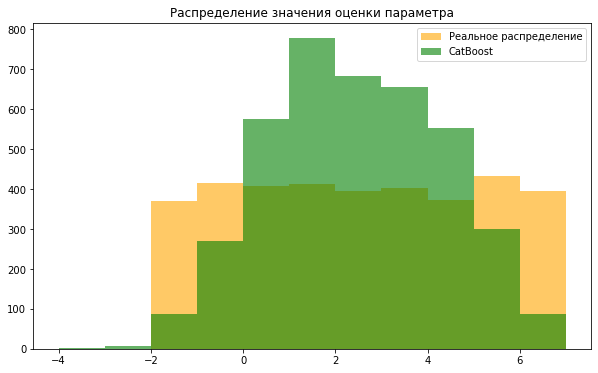

In [314]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    y_test,
    bins = bins,
    alpha = 0.6,
    color = 'orange',
    label = 'Реальное распределение'
)
plt.hist(
    y_pred,
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'CatBoost'
)
plt.legend()
plt.show()

In [297]:
cb = CatBoostRegressor(
    silent=True, eval_metric="MAE", custom_metric=["MAPE"], random_state=42
)
cb.fit(X_train, y_train, 
       eval_set=[(X_test, y_test)], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [315]:
for value, name in sorted(
    zip(cb.get_feature_importance(fstr_type="FeatureImportance"), 
        features), 
    reverse=True
):
    print("'{}\t{:.2f}'".format(name, value))

'mean_dist	8.58'
'mean_deltaScore50p	7.10'
'mean_utility	5.41'
'dispersy_dist	4.97'
'mean_deltawinrate50p	4.80'
'Score25p	4.72'
'median_scorelead	4.31'
'beautiful_percent 20	3.60'
'beautiful_percent 10	3.56'
'beautifulS_percent 20	3.26'
'mean_deltawinrate	3.11'
'Winrate75p	2.98'
'beautiful_percent	2.95'
'dispersy_scoreLead 10	2.47'
'Score75p	2.45'
'Winrate25p	2.43'
'mean_deltascoreLead	2.27'
'beautiful_percent yose	2.27'
'dispersy_scoreLead	2.19'
'mean_deltascoreLead 20	2.10'
'dispersy_scoreLead 20	2.06'
'dispersy_scoreLead yose	2.04'
'beautifulS_percent 10	1.92'
'mean_deltawinrate 10	1.65'
'mean_deltaSelfPlay 20	1.65'
'mean_deltaSelfPlay yose	1.63'
'mean_deltascoreLead yose	1.60'
'mean_deltaSelfPlay	1.57'
'mean_deltaSelfPlay 10	1.36'
'beautifulS_percent	1.28'
'mean_utility 10	1.22'
'mean_deltascoreLead 10	1.21'
'beautifulS_percent yose	1.20'
'mean_deltawinrate 20	1.17'
'mean_utility 20	1.01'
'mean_utility yose	0.99'
'mean_deltawinrate yose	0.93'


# RNN?

In [310]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
import torch, torch.nn as nn
import torch.nn.functional as F
import time

def plot_train_process(train_loss, test_loss, test_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(test_loss, label='test')
    axes[0].legend()

    axes[1].set_title('Test accuracy')
    axes[1].plot(test_accuracy)

NameError: name 'torch' is not defined